# Czech Semantic Textual Similarity

In [21]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
language = "Czech"
train = pd.read_csv("train.csv", sep="\t")
test = pd.read_csv("test.csv", sep="\t")

Let's see what are the rows in train and test datasets

In [24]:
train["id"] = train.index + 1
train[:10]

,Unnamed: 0,sentence_1,sentence_2,similarity,id
0,0,"Letadlo Boeing havarovalo v Rusku, 50 mrtvých.",Letadlo Boeing havarovalo v ruském městě Kazaň...,3.8,1
1,1,"Šokující tah, Obama odložil útok na Sýrii.",Obama odložil útok na Sýrii.,4.6,2
2,2,Japonský PM rozpouští sněmovnu pro volby,Írán a světové mocnosti jsou připravení vést j...,0.0,3
3,3,Palestinský diplomat zraněn při výbuchu v Praze,Palestinský velvyslanec zraněn při výbuchu apa...,4.0,4
4,4,Libanonská obchodní stávka na protest na polit...,"Tuniský prezident říká, sebejistota může přejí...",0.6,5
5,5,Francie varuje před extrémisty benefitujícími ...,"Francie straší, že extrémisté mohou těžit z Eg...",4.4,6
6,6,Putin vyhrál ruské prezidentské volby,V ruských prezidentských volbách začíná hlasování,1.0,7
7,7,Zemětřesení o síle 6.8 stupňů zasáhlo Šalamoun...,Rozsáhlé zemětřesení o síle 6.3 zasáhlo Šalamo...,3.2,8
8,8,Zimmerman zastaven za překročení rychlosti v T...,"Zimmerman zastavil v Texasu, kvůli rychlé jízd...",5.0,9
9,9,Bývalý důstojník LAPD hledán kvůli Irvine vraž...,Bývalý důstojník CIA odsouzen k 30 měsícům věz...,0.0,10


In [25]:
train.describe()

,Unnamed: 0,similarity,id
count,925.000000,925.000000,925.000000
mean,462.000000,2.598879,463.000000
std,267.168798,1.608610,267.168798
min,0.000000,0.000000,1.000000
25%,231.000000,1.200000,232.000000
50%,462.000000,2.600000,463.000000
75%,693.000000,4.000000,694.000000
max,924.000000,5.000000,925.000000


In [26]:

test["id"] = test.index + 1
test[:10]

,Unnamed: 0,sentence_1,sentence_2,similarity,id
0,0,Putin vyhlašuje vítězství v Ruských prezidents...,Stížností při ruských volbách narůstá,1.00,1
1,1,Profily kandidátů na prezidentský úřad v Keni.,Italský novinář vybrán jako kandidát na prezid...,1.00,2
2,2,Egypťané hlasují o dělící ústavě.,Egypťané hlasují o změně ústavy.,4.00,3
3,3,Egyptský soud zakazuje Muslimské bratrstvo.,Egyptský soud zakazuje činnost Muslimského bra...,3.80,4
4,4,Egyptské ozbrojené síly vyrazily uzavřít příst...,Egyptské ozbrojené síly vyrazily vyčistit tábo...,2.40,5
5,5,"7 zadržených lidí pro skandál ""domácí sestra"".","Čína zadržela 7 lidí pro skandál ""domácí sestra"".",4.20,6
6,6,Top diplomati se setkají v Mnichově v kritické...,Top diplomati diskutují Íránský jaderný program,2.40,7
7,7,Pákistánský velitel Talibánu byl zabit při nál...,Pohřeb pákistánského velitele Talibánu “se má ...,1.60,8
8,8,Sebevražedný atentátník zabil 12 lidí v kostel...,Sebevražedný atentátník zabil 21 lidí v severo...,0.75,9
9,9,Předseda Japonské opoziční strany kritizuje Ab...,Zimbabwská opoziční strana MDC napadá vítezstv...,0.00,10


In [27]:
def convert(row):
    if row['similarity'] <= 1.0:
        return '0-1'
    elif 1.0 < row['similarity'] <= 2.0:
        return '1-2'
    elif 2.0 < row['similarity'] <= 3.0:
        return '2-3'
    elif 3.0 < row['similarity'] <= 4.0:
        return '3-4'
    else:
        return '4-5'

train['category'] = train.apply(convert, axis=1)
test['category'] = test.apply(convert, axis=1)

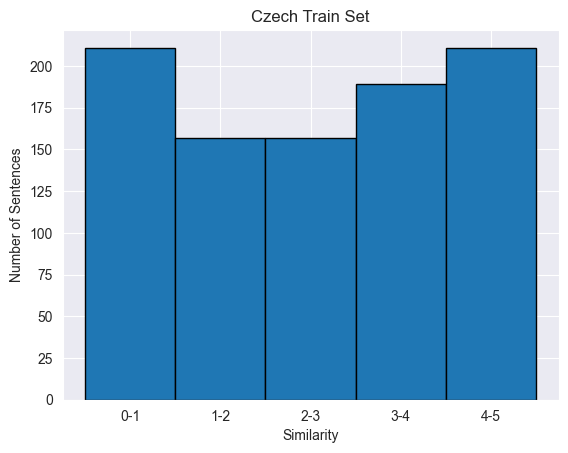

In [28]:
train.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Train Set")
plt.show()

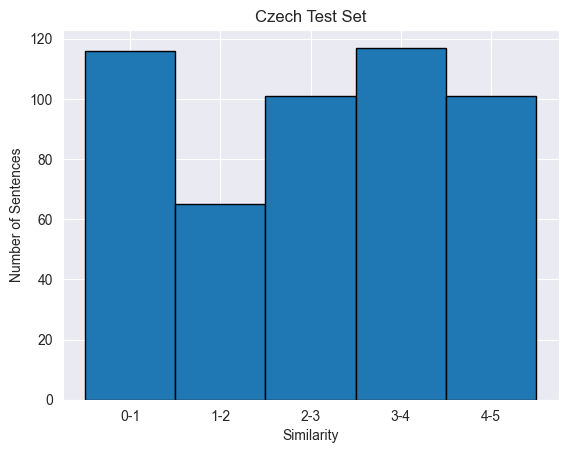

In [29]:
test.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Test Set")
plt.show()

In [30]:
def normalized_word_Common(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0* len(w1 & w2)

def normalized_word_Total(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1* (len(w1) + len(w2))

def normalized_word_share(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0*len(w1 & w2) / (len(w1) + len(w2))

def prepare_frequencies(df, id_column, column_1, column_2):
    df['freq_1'] = df.groupby(id_column)[id_column].transform('count')
    df['freq_2'] = df.groupby(id_column)[id_column].transform('count')
    df['s1len'] = df[column_1].str.len()
    df['s2len'] = df[column_2].str.len()
    df['s1_n_words'] = df[column_1].apply(lambda row :len(row.split(" ")))
    df['s2_n_words'] = df[column_2].apply(lambda row :len(row.split(" ")))

    df['word_Common'] = df.apply(normalized_word_Common, args=(column_1,column_2), axis=1)
    df['word_Total'] = df.apply(normalized_word_Total, args=(column_1,column_2), axis = 1)
    df['word_share'] = df.apply(normalized_word_share, args=(column_1,column_2), axis = 1)

    df['freq_s1+s2'] = df['freq_1'] + df['freq_2']
    df['freq_s1-s2'] = abs(df['freq_1'] - df['freq_2'])

    return df


In [31]:
train = prepare_frequencies(train, "id", "sentence_1", "sentence_2")
test = prepare_frequencies(test, "id", "sentence_1", "sentence_2")

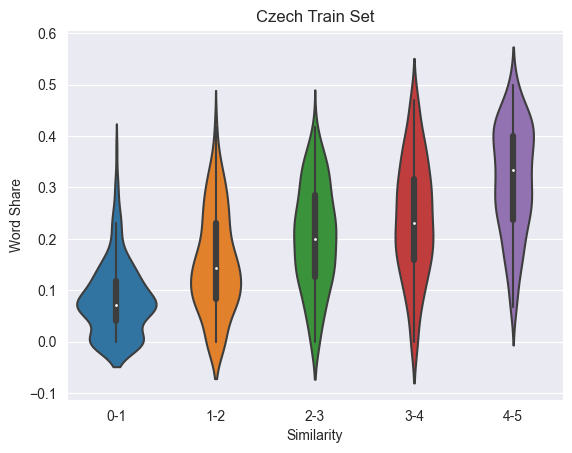

In [32]:
ax = sns.violinplot(x = 'category', y='word_share', data = train[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Train Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

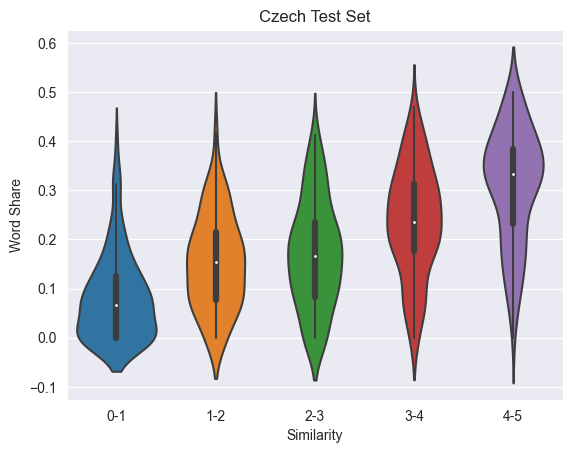

In [33]:
ax = sns.violinplot(x = 'category', y='word_share', data = test[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Test Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

In [34]:
train[:10]

,Unnamed: 0,sentence_1,sentence_2,similarity,id,category,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
0,0,"Letadlo Boeing havarovalo v Rusku, 50 mrtvých.",Letadlo Boeing havarovalo v ruském městě Kazaň...,3.8,1,3-4,1,1,46,59,7,9,6.0,16,0.375000,2,0
1,1,"Šokující tah, Obama odložil útok na Sýrii.",Obama odložil útok na Sýrii.,4.6,2,4-5,1,1,42,28,7,5,5.0,12,0.416667,2,0
2,2,Japonský PM rozpouští sněmovnu pro volby,Írán a světové mocnosti jsou připravení vést j...,0.0,3,0-1,1,1,40,62,6,9,0.0,15,0.000000,2,0
3,3,Palestinský diplomat zraněn při výbuchu v Praze,Palestinský velvyslanec zraněn při výbuchu apa...,4.0,4,3-4,1,1,47,52,7,6,4.0,13,0.307692,2,0
4,4,Libanonská obchodní stávka na protest na polit...,"Tuniský prezident říká, sebejistota může přejí...",0.6,5,0-1,1,1,64,67,9,9,0.0,17,0.000000,2,0
5,5,Francie varuje před extrémisty benefitujícími ...,"Francie straší, že extrémisté mohou těžit z Eg...",4.4,6,4-5,1,1,65,61,8,9,4.0,17,0.235294,2,0
6,6,Putin vyhrál ruské prezidentské volby,V ruských prezidentských volbách začíná hlasování,1.0,7,0-1,1,1,37,49,5,6,0.0,11,0.000000,2,0
7,7,Zemětřesení o síle 6.8 stupňů zasáhlo Šalamoun...,Rozsáhlé zemětřesení o síle 6.3 zasáhlo Šalamo...,3.2,8,3-4,1,1,58,66,8,9,5.0,17,0.294118,2,0
8,8,Zimmerman zastaven za překročení rychlosti v T...,"Zimmerman zastavil v Texasu, kvůli rychlé jízd...",5.0,9,4-5,1,1,75,65,10,9,3.0,19,0.157895,2,0
9,9,Bývalý důstojník LAPD hledán kvůli Irvine vraž...,Bývalý důstojník CIA odsouzen k 30 měsícům věz...,0.0,10,0-1,1,1,50,69,7,11,2.0,18,0.111111,2,0


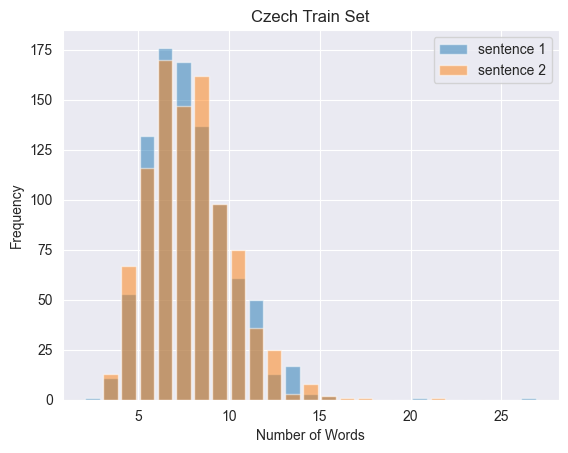

In [35]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(train['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(train['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Train Set")
plt.legend()
plt.show()

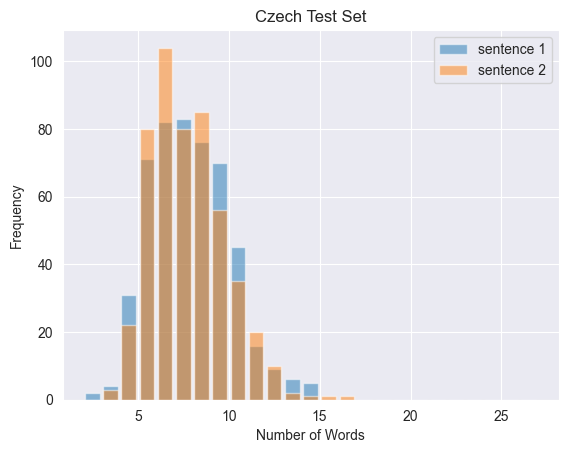

In [36]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(test['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(test['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Test Set")
plt.legend()
plt.show()

In [37]:
train.describe()

,Unnamed: 0,similarity,id,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,925.000000,925.000000,925.000000,925.0,925.0,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.0,925.0
mean,462.000000,2.598879,463.000000,1.0,1.0,44.760000,44.976216,7.328649,7.345946,2.838919,14.558919,0.199479,2.0,0.0
std,267.168798,1.608610,267.168798,0.0,0.0,15.735459,15.285858,2.303322,2.271910,1.953186,3.932058,0.128303,0.0,0.0
min,0.000000,0.000000,1.000000,1.0,1.0,11.000000,13.000000,2.000000,3.000000,0.000000,5.000000,0.000000,2.0,0.0
25%,231.000000,1.200000,232.000000,1.0,1.0,33.000000,33.000000,6.000000,6.000000,1.000000,12.000000,0.090909,2.0,0.0
50%,462.000000,2.600000,463.000000,1.0,1.0,43.000000,45.000000,7.000000,7.000000,3.000000,14.000000,0.181818,2.0,0.0
75%,693.000000,4.000000,694.000000,1.0,1.0,54.000000,56.000000,9.000000,9.000000,4.000000,17.000000,0.294118,2.0,0.0
max,924.000000,5.000000,925.000000,1.0,1.0,162.000000,135.000000,26.000000,21.000000,11.000000,42.000000,0.500000,2.0,0.0


In [38]:
test.describe()

,Unnamed: 0,similarity,id,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,500.000000,500.000000,500.000000,500.0,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0,500.0
mean,249.500000,2.596260,250.500000,1.0,1.0,45.458000,44.610000,7.376000,7.252000,2.754000,14.484000,0.192272,2.0,0.0
std,144.481833,1.552954,144.481833,0.0,0.0,14.835512,14.035522,2.189111,2.050587,2.040051,3.592709,0.131081,0.0,0.0
min,0.000000,0.000000,1.000000,1.0,1.0,12.000000,17.000000,2.000000,3.000000,0.000000,6.000000,0.000000,2.0,0.0
25%,124.750000,1.200000,125.750000,1.0,1.0,34.000000,34.000000,6.000000,6.000000,1.000000,12.000000,0.076923,2.0,0.0
50%,249.500000,2.800000,250.500000,1.0,1.0,45.000000,43.000000,7.000000,7.000000,2.000000,14.000000,0.184659,2.0,0.0
75%,374.250000,4.000000,375.250000,1.0,1.0,56.000000,54.000000,9.000000,9.000000,4.000000,17.000000,0.300000,2.0,0.0
max,499.000000,5.000000,500.000000,1.0,1.0,95.000000,92.000000,14.000000,16.000000,11.000000,26.000000,0.500000,2.0,0.0
